# Modelling for Global Health - Data science in Python
## Day 1: Collecting disparate data online by web scraping using Selenium and BeautifulSoup

Ideally the data we wish to work on can be downloaded in an easy to use format. Otherwise when we want only a small subset of a very big dataset, or the data is being constantly updated, hopefully the owner will provide an application programming interface (API) to automate the collection of the relevant data. However quite often the data cannot be downloaded and there is no API, but the data is publicly available, just dispersed across a website. When it would be too tedious and time consuming to navigate page by page to collect the data manually; we can use Selenium Webdriver and Beautiful Soup to automate navigating across the website and collecting of the relevant data. In this code clinic, I will go through the best practices (and what not to do!) when web scraping; using Selenium Webdriver to navigate around a website and then using Beautiful Soup to extract the data from the HTML.


In [2]:
from os import path


### Introduction: Why automate? 

In [1]:
# Example 1 - get KIR haplotypes
def get_hap():
    """Python file to get the KIR haplotypes:
        KIR_barcode2haplotype.py

        Python reference file for barcode to haplotype:
        results/allelefreqdotnet_barcode2haplotype.p

        Excel reference file for barcode to haplotype:
        KIR_af_haplotypes_reference.csv

        Results of the police men from Guinea Bissau:
        db_police_final.csv
    """
    # Open Webrowser
    from bs4 import BeautifulSoup
    import re
    from selenium import webdriver
    from time import sleep
    from random import randint
    from natsort import natsorted
    
    ref = ['3DL1', '2DL1', '2DL3', '2DS4', '2DL2', '2DL5', '3DS1', '2DS1', '2DS2', '2DS3', '2DS5', '2DL4', '3DL2', '3DL3', '2DP1', '3DP1']
    to_redo = ['1111011111111111', '1111110110111111', '1111110011011111', '1111000000011111', '1111110010111111']
    
    browser = webdriver.Firefox()

    # Set constants
    base_url = "http://allelefrequencies.net/kir6001a.asp?kgen_pop_selection=&kgen_group=&kgen_id=&kgen_country=&kgen_pops_pattern=equal&kgen_pops=&kgen_dataset=&kgen_region=&kgen_ethnic=&kgen_study=&kgen_order=order_1&"
    
    wrong = []
    for barcode in set(to_redo):
        end_url = ''
        for i,j in zip(ref, barcode):
            end_url += i + '=' + str(j) + '&'
        end_url = end_url[:-1]
        url = base_url + end_url
        
        browser.get(url)
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')
    
        for node in soup.findAll(attrs={'class': re.compile(r"table01")}):
            if (node.td is None) or (node.td.contents[0] == '\xa0'):
                print('Missing')
                Xx_count += 1
                af_hap = 'Xx' + str(Xx_count)
                break # Finds more than one table if the data is missing
            elif 'AA' in node.td.contents[0]:
                print('Got it')
                af_hap = node.td.next.next + node.td.next.next.next.next.next.a.contents[0]
            else:
                print('Got it')
                af_hap = node.td.contents[0].rstrip() + node.td.next.next.next.a.contents[0]
        
        print(barcode, af_hap)
        # barcode2haplotype[barcode] = af_hap
        sleep(5 + (randint(1,50) / 25))

In [2]:
# Example collecting KIR haplotypes from allelefrequencies.net
get_hap()

Got it
1111110011011111 Bx5
Got it
1111110110111111 Bx9
Got it
1111000000011111 AA1
Got it
1111011111111111 Bx56
Got it
1111110010111111 Bx21


In [35]:
# Example 2 - Get Library books
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from time import sleep
from random import randint
import pandas as pd

url = "https://libcat.oxfordshire.gov.uk/web/arena/results?p_p_id=crDetailWicket_WAR_arenaportlet&p_p_lifecycle=1&p_p_state=normal&p_r_p_arena_urn%3Aarena_search_item_id="

# Name /Author :[arena_search_item_id]
books = {
"The kiwi's egg : Charles Darwin and natural selection / David Quammen" :['0297845691&p'],
'Blueprint : how DNA makes us who we are / Robert Plomin' :['0241282071&p', '0141984260&p'],
'Human compatible : artificial intelligence and the problem of control / Stuart Russell' :['0241335205&p'],
'Fake law : the truth about justice in an age of lies / The Secret Barrister' :['1529009944&p'],
'Somersault / Kenzaburo Oe' :['1843540800&p']}


browser = webdriver.Firefox()
results = {}
count = 0
for book in books:
    for version in books[book]:
        browser.get(url + version)
        sleep(6.25 + (randint(1,50) / 25))
        html_source = browser.page_source

        soup = BeautifulSoup(html_source)
        
        for foo in soup.find_all('div', attrs={'class': 'arena-holding-container clearfix'}):
            if foo.text != 'Oxfordshire':
                results[count] = {}
                results[count]['Book'] = book.split(' / ')[0]
                results[count]['Author'] = book.split(' / ')[1]
                results[count]['Library'] = foo.text.replace(' Library', '').strip()
                results[count]['Status'] = foo.find_next('div', attrs={'class': 'arena-availability-right'}).text.replace('\n', '')
                if foo.find_previous('div', attrs={'class': 'arena-detail-class'}) != None:
                    results[count]['Classification'] = foo.find_previous('div', attrs={'class': 'arena-detail-class'}).text.split(': ')[1].replace(' ', '')
                else:
                    results[count]['Classification'] = 'Not known'
                count += 1
        

df = pd.DataFrame(results).T

print(df)

                                                 Book                Author  \
0   The kiwi's egg : Charles Darwin and natural se...         David Quammen   
1             Blueprint : how DNA makes us who we are         Robert Plomin   
2             Blueprint : how DNA makes us who we are         Robert Plomin   
3             Blueprint : how DNA makes us who we are         Robert Plomin   
4             Blueprint : how DNA makes us who we are         Robert Plomin   
5             Blueprint : how DNA makes us who we are         Robert Plomin   
6             Blueprint : how DNA makes us who we are         Robert Plomin   
7   Human compatible : artificial intelligence and...        Stuart Russell   
8   Fake law : the truth about justice in an age o...  The Secret Barrister   
9   Fake law : the truth about justice in an age o...  The Secret Barrister   
10  Fake law : the truth about justice in an age o...  The Secret Barrister   
11  Fake law : the truth about justice in an age o..

### Section 0: Load the packages and open a remote controlled browser

In [4]:
# Import the necessary packages
from selenium import webdriver
import requests

In [5]:
# Fire up Selenium webdriver with the website we want to scrape
browser = webdriver.Firefox() # If you use a different browser, replace Firefox with this
base_url = "https://www.literaryclock.com/"
browser.get(base_url)

# # Alternatively, use requests
# requests.get(base_url, timeout=1) # Hopefully get Response [200], not [404]

### Section 1: Navigating around using selenium

#### 1.1: Using link text

In [6]:
# Start navigating around
element = browser.find_element_by_link_text("Posts")
print(element)

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="7f69073d-8066-4a67-91cc-056bd405c449", element="af6624a6-011f-45c2-8fea-8a3a64fc752c")>


In [7]:
element.click()

#### 1.2: How to submit text, and limitations of being a robot

In [8]:
# Go to text, play around with inputing text
browser.find_element_by_link_text("Contact").click()

In [9]:
# Need to find the boxes to input text
element = browser.find_element_by_css_selector('input[id="name"]')
print(element)

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="7f69073d-8066-4a67-91cc-056bd405c449", element="997a0684-0d65-4496-8e37-53c740f143b6")>


In [10]:
element.send_keys('Justin')

In [11]:
# Similarly can you put text in the subject line
browser.find_element_by_css_selector('input[id="subject"]').send_keys('Hello!')

In [12]:
# Slightly different challenge in inputing data into the message box
# Message is not an 'input', it is a textarea
browser.find_element_by_css_selector('textarea[id="message"]').send_keys('How are you doing?')

In [13]:
# Can we automatically pretend not to be a robot, probably not.

In [15]:
# Now how do we click on the send button
browser.find_element_by_css_selector('input[id="submit"]').click()

### Section 2: Webscraping time

#### 2.1 Can we get a the literary works, their authors and their date

In [16]:
# Navigate to Posts
browser.find_element_by_link_text("Posts").click()

In [17]:
# And now The Literary Clock Library
browser.find_element_by_link_text("The Literary Clock Library").click()

ElementNotInteractableException: Message: Element <a href="/posts/Lt5_Library"> could not be scrolled into view


In [18]:
# Use javascript to click on the element instead
element = browser.find_element_by_link_text("The Literary Clock Library")
print(element)
browser.execute_script("arguments[0].click();", element)

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="7f69073d-8066-4a67-91cc-056bd405c449", element="c8aa6ead-1afc-46d2-972d-a2f2601ad8eb")>


In [19]:
# And now to the 1500s
browser.find_element_by_link_text("1500s").click()

In [20]:
# Can we grab the plays first performed in the 1500s
from bs4 import BeautifulSoup
from time import sleep

html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')

# # Alternative with requests
# html = requests.get(base_url+'library/1500', timeout=1)
# soup = BeautifulSoup(html.text, 'html.parser')

In [21]:
# Looking at the 'li' tag
print(soup.li)

<li><a href="/">Home</a></li>


In [22]:
# OK, get all the 'li' tags
print(soup.findAll('li'))

[<li><a href="/">Home</a></li>, <li><a href="/posts/">Posts</a></li>, <li><a href="/contact">Contact</a></li>, <li>1591: King Richard III by William Shakespeare</li>, <li>1599: As You Like It by William Shakespeare</li>]


In [23]:
# Look to see if it is a link or not
for i in soup.findAll('li'):
    print(i.a)
    

<a href="/">Home</a>
<a href="/posts/">Posts</a>
<a href="/contact">Contact</a>
None
None


In [24]:
# So we can filter out by link (and we can also look at the link)
for i in soup.findAll('li'):
    if i.a != None:
        print(i.a['href'])

/
/posts/
/contact


In [25]:
books = {}
counter = 0
for i in soup.findAll('li'):
    if i.a == None:
        books[counter] = {}
        
        book = i.string
        
        books[counter]['Year'] = int(book[:4])
        
        temp = book[6:].split(' by ')
        
        books[counter]['Title'] = temp[0]
        books[counter]['Author'] = temp[1]
        
        counter +=1

In [26]:
# Can now look at this in a dataframe
import pandas as pd
df = pd.DataFrame(books).T
print(df)

   Year             Title               Author
0  1591  King Richard III  William Shakespeare
1  1599    As You Like It  William Shakespeare


In [27]:
# OK, lets add the 1600s
browser.find_element_by_partial_link_text("Next").click() # Nice alternative to find_element_by_link_text

# Now put all of the books from this page into the "books" dictionary
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')

# # Alternative with requests
# html = requests.get(base_url+'library/1600', timeout=1)
# soup = BeautifulSoup(html.text, 'html.parser')

for i in soup.findAll('li'):
    if i.a == None:
        books[counter] = {}
        
        book = i.string
        
        books[counter]['Year'] = int(book[:4])
        
        temp = book[6:].split(' by ')
        
        books[counter]['Title'] = temp[0]
        books[counter]['Author'] = temp[1]
        
        counter +=1
        
df = pd.DataFrame(books).T
print(df)

   Year                                   Title               Author
0  1591                        King Richard III  William Shakespeare
1  1599                          As You Like It  William Shakespeare
2  1603                                  Hamlet  William Shakespeare
3  1623                                 Macbeth  William Shakespeare
4  1669  The Diary of Samuel Pepys: A Selection         Samuel Pepys


#### 2.2 Automatically get all the literary works, their authors and their date

In [28]:
# OK let's go back to the 1500s and try get them all
from time import sleep
browser.find_element_by_partial_link_text("Prev").click()

carry_on = True
books = {}
counter = 0
while carry_on:
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    
    for i in soup.findAll('li'):
        if i.a == None:
            books[counter] = {}
        
            book = i.string
            # print(book)
        
            books[counter]['Year'] = int(book[:4])
        
            temp = book[6:].split(' by ')
        
            books[counter]['Title'] = temp[0]
            books[counter]['Author'] = temp[1]
        
            counter +=1
            
    try:
        browser.find_element_by_partial_link_text("Next").click()
        sleep(2)
    except:
        carry_on=False

IndexError: list index out of range

In [29]:
df = pd.DataFrame(books).T
print(df)

   Year                                              Title  \
0  1591                                   King Richard III   
1  1599                                     As You Like It   
2  1603                                             Hamlet   
3  1623                                            Macbeth   
4  1669             The Diary of Samuel Pepys: A Selection   
5  1759  The Life and Opinions of Tristram Shandy, Gent...   
6  1790                               Mutiny on the Bounty   
7  1798                    The Rime of the Ancient Mariner   
8  1800                                             o 1850   

                    Author  
0      William Shakespeare  
1      William Shakespeare  
2      William Shakespeare  
3      William Shakespeare  
4             Samuel Pepys  
5          Laurence Sterne  
6            William Bligh  
7  Samuel Taylor Coleridge  
8                      NaN  


In [ ]:
# OK, lets check how best to collect the data
# Can do it in two parts - first up 1500s, 1600s and 1700s

books = {}
counter = 0
for century in ['/1500', '/1600', '/1700']:
    browser.get(base_url + 'library' + century)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    
#     # Alternative with requests
#     html = requests.get(base_url + 'library' + century, timeout=1)
#     soup = BeautifulSoup(html.text, 'html.parser')
    
    for i in soup.findAll('li'):
        if i.a == None:
            books[counter] = {}

            book = i.string
            # print(book)

            books[counter]['Year'] = int(book[:4])

            temp = book[6:].split(' by ')

            books[counter]['Title'] = temp[0]
            books[counter]['Author'] = temp[1]

            counter +=1
    
    sleep(2)

df = pd.DataFrame(books).T
print(df)

In [30]:
# Now for the 1800s, 1900s and 2000s
for century in ['/1800', '/1900', '/2000']:
    browser.get(base_url + 'library' + century)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    
#     # Alternative with requests
#     html = requests.get(base_url + 'library' + century, timeout=1)
#     soup = BeautifulSoup(html.text, 'html.parser')
    
    to_do = []
    for i in soup.findAll('a'):
        if '/library' + century in i['href']:
            to_do.append(i['href'])
    
    for period in to_do:
        browser.get(base_url + period)
        html_source = browser.page_source
        soup = BeautifulSoup(html_source, 'html.parser')
        
#         # Alternative with requests
#         html = requests.get(base_url + period, timeout=1)
#         soup = BeautifulSoup(html.text, 'html.parser')
        
        for i in soup.findAll('li'):
            if i.a == None:
                books[counter] = {}

                book = i.string
                # print(book)

                books[counter]['Year'] = int(book[:4])

                temp = book[6:].split(' by ')

                books[counter]['Title'] = temp[0]
                books[counter]['Author'] = temp[1]

                counter +=1
        
        sleep(2)

df = pd.DataFrame(books).T

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

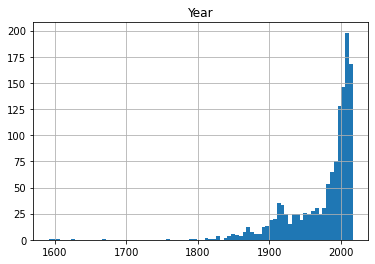

In [31]:
# Look to quickly plot the distribution of years
df['Year'] = df['Year'].astype('int')
df.hist(column='Year', bins=80)

In [32]:
df

,Year,Title,Author
0,1591,King Richard III,William Shakespeare
1,1599,As You Like It,William Shakespeare
2,1603,Hamlet,William Shakespeare
3,1623,Macbeth,William Shakespeare
4,1669,The Diary of Samuel Pepys: A Selection,Samuel Pepys
...,...,...,...
1308,2016,Rampage,John Sandford
1309,2016,My Name Is Not Jacob Ramsay,Ben Trebilcook
1310,2016,The Screaming: Dead City,Matthew Warwick
1311,2016,"For Richer, For Poorer",Kerry Wilkinson


In [34]:
to_do

['/library/2000/2000',
 '/library/2000/2001',
 '/library/2000/2002',
 '/library/2000/2003',
 '/library/2000/2004',
 '/library/2000/2005',
 '/library/2000/2006',
 '/library/2000/2007',
 '/library/2000/2008',
 '/library/2000/2009',
 '/library/2000/2010',
 '/library/2000/2011',
 '/library/2000/2012',
 '/library/2000/2013',
 '/library/2000/2014',
 '/library/2000/2015',
 '/library/2000/2016',
 '/library/2000/2017']